# Principal Component Analysis (PCA)


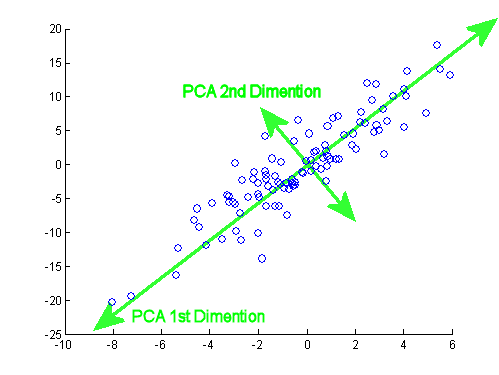

## Importing the libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

| 索引 | 英文名稱                        | 繁體中文名稱                  | 數據類型 | 描述                                         |
|------|--------------------------------|------------------------------|----------|---------------------------------------------|
| 0    | Alcohol                        | 酒精                          | float64  | Wine's alcohol content by volume            |
| 1    | Malic Acid                     | 蘋果酸                        | float64  | Amount of malic acid in the wine            |
| 2    | Ash                            | 灰                            | float64  | Ash content in the wine                     |
| 3    | Alkalinity of Ash              | 灰的鹼性                      | float64  | Measure of the alkalinity of ash in the wine|
| 4    | Magnesium                      | 鎂                            | float64  | Magnesium content in the wine               |
| 5    | Total Phenols                  | 總酚                          | float64  | Total phenol content in the wine            |
| 6    | Flavanoids                     | 黃烷醇                        | float64  | Flavanoid content in the wine               |
| 7    | Nonflavanoid Phenols           | 非黃烷醇酚                     | float64  | Nonflavanoid phenol content in the wine     |
| 8    | Proanthocyanins                | 原花青素                      | float64  | Proanthocyanin content in the wine          |
| 9    | Color Intensity                | 顏色強度                      | float64  | Intensity of the wine's color               |
| 10   | Hue                            | 色調                          | float64  | The hue of the wine                         |
| 11   | OD280/OD315 of Diluted Wines   | 稀釋葡萄酒的 OD280/OD315 比值 | float64  | Absorbance ratio indicating protein concentration |
| 12   | Proline                        | 脯氨酸                        | float64  | Proline content in the wine                 |
| 13   | Target                         | 目標                          | float64  | The classification target of the wine       |

In [60]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [64]:
X_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

In [82]:
# 獲取主成分係數
# 計算主成分係數：通過pca.components_.T * np.sqrt(pca.explained_variance_)計算每個特徵對主成分的貢獻度。
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 創建DataFrame以便於觀察
features = dataset.iloc[:, :-1].columns
loadings_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=features)

# 每個特徵對主成分的貢獻度
print(loadings_df)



                      Principal Component 1  Principal Component 2
Alcohol                            0.284794              -0.792109
Malic_Acid                        -0.537594              -0.368459
Ash                               -0.022390              -0.500909
Ash_Alcanity                      -0.528530               0.036925
Magnesium                          0.277970              -0.410977
Total_Phenols                      0.855791              -0.160124
Flavanoids                         0.939596              -0.033365
Nonflavanoid_Phenols              -0.670358              -0.063464
Proanthocyanins                    0.676282              -0.107285
Color_Intensity                   -0.242321              -0.844269
Hue                                0.674859               0.431966
OD280                              0.827050               0.255587
Proline                            0.617732              -0.581229


## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

## Visualising the Training set results

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_34788\1993520435.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


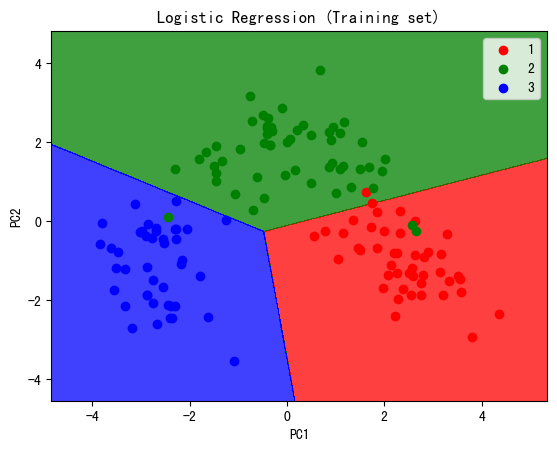

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_34788\3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


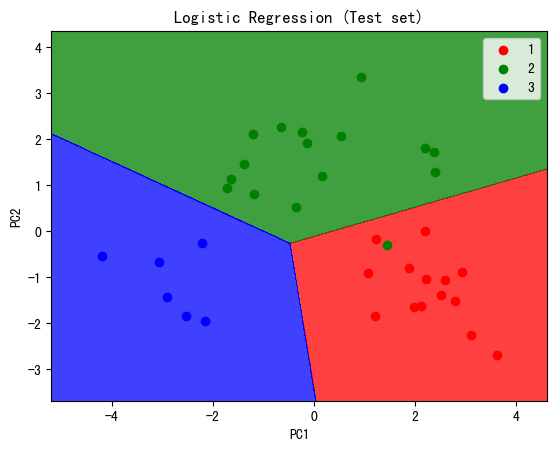

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()